In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import pathlib
import sys 
import os
sys.path.append(os.path.abspath("../"))
from ultralytics import YOLO

In [36]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageDraw
import imutils
import supervisely as sly

In [37]:
IMAGE_PATH = pathlib.Path("D:\Data_QR\data\qr_171.jpg")

In [38]:
# Định nghĩa đường dẫn đến mô hình và ảnh
model_path = "D:\\HK5\\CS406\\TestQR3\\exportmodel\\best2.pt"
# image_path = pathlib.Path("D:\\Data_QR\\data\\qr_2039.jpg")

model = YOLO(model_path)

# Dự đoán trên ảnh với các tùy chọn bổ sung
result = model.predict(source=IMAGE_PATH , conf=0.6, save=True, device='cpu')



image 1/1 D:\Data_QR\data\qr_171.jpg: 448x640 1 qr, 143.1ms
Speed: 4.0ms preprocess, 143.1ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict67


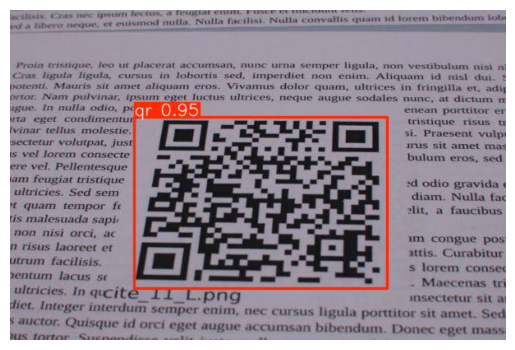

In [39]:
# Hiển thị ảnh (tùy chọn)
img_with_boxes = result[0].plot()
plt.imshow(img_with_boxes)
plt.axis('off')  # Ẩn trục
plt.show()  # Hiển thị ảnh

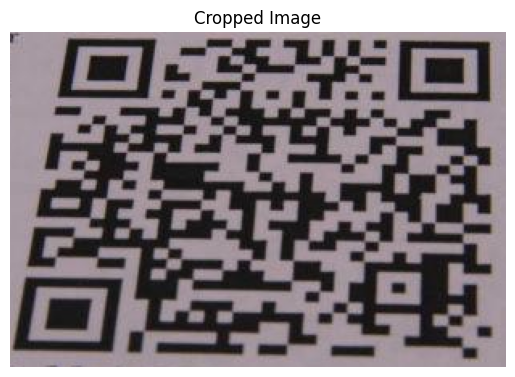

In [40]:
# Đọc ảnh gốc
image = cv2.imread(str(IMAGE_PATH))

# Khởi tạo biến image_crop
image_crop = image

# Lấy bounding box có độ tin cậy cao nhất
for idx, result in enumerate(result):
    if len(result.boxes) > 0:
        # Sắp xếp các box theo độ tin cậy từ cao đến thấp và lấy box đầu tiên
        best_box = sorted(result.boxes, key=lambda box: box.conf[0], reverse=True)[0]
        x_min, y_min, x_max, y_max = map(int, best_box.xyxy[0])  # Lấy tọa độ dạng int

        # Cắt ảnh trong bounding box
        image_crop = image[y_min:y_max, x_min:x_max]
        image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
        # Hiển thị hình ảnh đã cắt
        plt.imshow(image_crop)  # Chuyển đổi màu BGR sang RGB
        plt.axis('off')  # Ẩn trục
        plt.title('Cropped Image')  # Tiêu đề cho hình ảnh
        plt.show()  # Hiển thị cửa sổ
    else:
        print(f"Image {idx + 1}: No bounding box detected.")

In [41]:
img_gray = cv2.cvtColor(image_crop, cv2.COLOR_RGB2GRAY)
# Áp dụng Adaptive Threshold
binary_img = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 45, 3
)

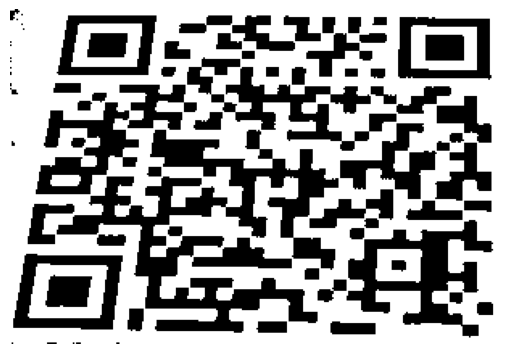

In [42]:
plt.imshow(binary_img, "gray")
plt.axis("off")
plt.show()

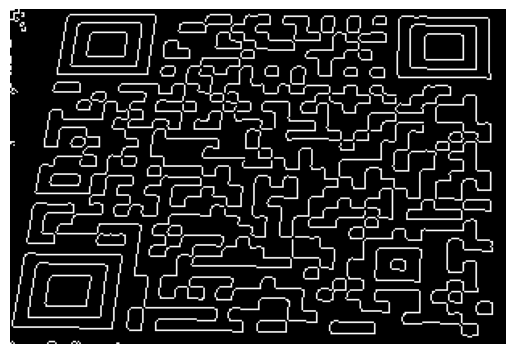

In [43]:
low_threshold = 70  
high_threshold = 170  
edges = cv2.Canny(binary_img, low_threshold, high_threshold)

plt.imshow(edges, "gray")
plt.axis("off")
plt.show()

In [44]:
lines = cv2.HoughLinesP(edges, rho=2, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=20)

# Vẽ các đoạn thẳng lên ảnh gốc
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_crop, (x1, y1), (x2, y2), (0, 255, 0), 1)

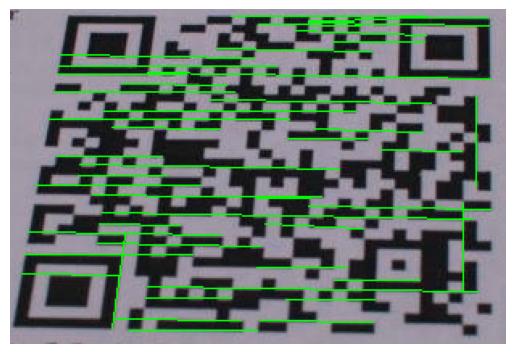

In [45]:
# Hiển thị ảnh
plt.imshow(cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()